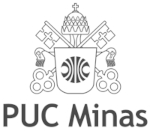

## Programa de Pós Graduação em Informática

### Disciplina: Natural Language Processing (NLP)

### Aluno: Felipe A. L. Reis

---
---
# Projeto Final da Disciplina de NLP
---
---

---
## Descrição do Problema

Para desenvolvimento deste trabalho, foi utilizada a base de dados **U.S. Patent Phrase to Phrase Matching**, que contém a correlação entre expressões, utilizadas no contexto de patentes americanas, disponível em https://www.kaggle.com/competitions/us-patent-phrase-to-phrase-matching/.

A base de dados está disponível via uma competição pública no [Kaggle](https://www.kaggle.com).

A base de dados correlaciona duas expressões: uma **frase-âncora** (*anchor*), usada como referência, e uma **frase-alvo** (*target*), correspondente à expressão a ser correlacionada. As duas expressões são relacionadas de acordo com uma **pontuação** (*score*), que varia de 0 a 1, com incrementos de 0.25, onde:

* 1.0 - Correspondência muito próxima. Normalmente, essa é uma correspondência exata, exceto possivelmente por diferenças na conjugação, quantidade (por exemplo, singular versus plural) e adição ou remoção de palavras irrelevantes (por exemplo, "o", "e", "ou").
* 0,75 - sinônimo próximo, ex. “telefone celular” versus “celular”. Isto também inclui abreviaturas, e. "TCP" -> "protocolo de controle de transmissão".
* 0,5 - Sinônimos que não possuem o mesmo significado (mesma função, mesmas propriedades). Isso inclui correspondências ampla-estreita (hipônimo) e estreita-ampla (hiperônimo).
* 0,25 - Um pouco relacionado, ex. as duas frases estão no mesmo domínio de alto nível, mas não são sinônimos. Isso também inclui antônimos.
* 0,0 - Não relacionado.

A base de dados não contém um *corpus* para treinamento - somente contém a correlação entre as expressões.

### Descrição da Base de Dados e Problema (Traduzido do Kaggle)

Neste conjunto de dados, são apresentados pares de frases (uma âncora e uma frase-alvo) e solicitados a avaliar quão semelhantes elas são em uma escala de 0 (nada semelhante) a 1 (idêntico em significado). Este desafio difere de uma tarefa de similaridade semântica padrão em que a similaridade foi pontuada aqui dentro do contexto de uma patente, especificamente seu [CPC classification (version 2021.05)](https://en.wikipedia.org/wiki/Cooperative_Patent_Classification), que indica o assunto ao qual a patente se refere. Por exemplo, enquanto as frases "*bird*" e "*Cape Cod*" podem ter baixa similaridade semântica na linguagem normal, a semelhança de seu significado é muito mais próxima se considerada no contexto de "casa".

Os códigos enviados serão executados em um conjunto de teste invisível (privado). O conjunto de teste privado contém aproximadamente 12 mil pares de frases. Um pequeno conjunto de teste público, com 36 pares de frases, foi fornecido para fins de teste, mas não é usado na pontuação.

Informações sobre o significado dos códigos CPC podem ser encontradas no [site USPTO](https://www.uspto.gov/web/patents/classification/cpc/html/cpc.html). O CPC versão 2021.05 pode ser encontrada no [site](https://www.cooperativepatentclassification.org/Archive).

### Arquivos

A base de dados contém os seguintes arquivos:

* *train.csv* - o conjunto de treinamento, contendo frases, contextos e suas pontuações de similaridade;
* *test.csv* - o conjunto de teste, idêntico em estrutura ao conjunto de treinamento, mas sem a pontuação;
* *sample_submission.csv* - um arquivo de envio de amostra no formato correto.

### Colunas

O arquivo de treinamento contém as seguintes colunas:

* *id* - um identificador exclusivo para um par de frases;
* *anchor* - primeira frase;
* *target* - segunda frase;
* *context* - contexto, segundo [CPC classification (version 2021.05)](https://en.wikipedia.org/wiki/Cooperative_Patent_Classification), que indica o assunto dentro do qual a semelhança deve ser pontuada;
* *score* - similaridade (pontuação esperada), oriundo da classificação manual de um ou mais especialistas.

---
## Soluções Adotadas

As soluções adotadas estão disponíveis na lista de arquivos a seguir:

* [01_us-patent_analise-dados.ipynb](01_us-patent_analise-dados.ipynb)
* [02_us-patent_tf-idf.ipynb](02_us-patent_tf-idf.ipynb)
* [03_us-patent_word2vec.ipynb](03_us-patent_word2vec.ipynb)
* [04_us-patent_bert.ipynb](04_us-patent_bert.ipynb)
* [nlputil.py](nlputil.py)

Os arquivos [nltk.yml](nltk.yml) e [nlp.yml](nlp.yml) contém a lista de depedências, para ambiente [Anaconda](https://anaconda.org/), utilizados para execução dos experimentos. 

O ambiente gerado pelo arquivo [nltk.yml](nltk.yml) deve ser utilizado nos Notebooks 01, 03 e 04. Esses notebooks utilizam ```pytorch``` e ```nltk```.

Devido a conflitos entre ```pytorch``` e ```tensorflow```, foi criado um outro ambiente, disponível no arquivo [nlp.yml](nlp.yml). Esse ambiente deve ser utilizado com o Notebook 02.


### Arquivo NLP Útil

O arquivo [nlputil.py](nlputil.py) contém funções úteis, utilizadas nos Notebooks.

Segue abaixo a lista de funções:

* ```load_data```: Carrega os dados dos arquivos .csv, usados para treinamento e testes;
* ```seaborn_plot```: Plota gráficos para análise dos dados da base;
* ```split_data```: Função para divisão dos conjuntos de treinamento e testes;
* ```preProcessCorpus```: Pre processa corpus;
* ```get_examples```: Retorna alguns exemplos do conjunto de treinamento, para inspeção visual;
* ```nltk_pre_processing```: Pré processa corpus, utilizando lemma, stem e expressões regulares;
* ```do_lemma_stemmer```: Pré processa dados em pandas, aplicando lematização, stemmer e remoção de stop words;
* ```calcula_correlacao```: Estima correlação entre os valores preditos e previstos (evitando usar o Kaggle);
* ```calcula_mse```: Estima correlação entre os valores preditos e previstos, usando a métrica MSE.
* ```pre_process_data_codes```: Adiciona informações de contexto aos dados (treinamento ou testes).
* ```pre_process_codes```: Adiciona informações de contexto (inclusive subcontextos) aos dados.


### Análise de Dados

A análise de dados foi utilizada para entendimento do conjunto e para extração de *insights*, úteis para as atividades seguintes.

As atividades avaliadas durante a análise de dados foram:

* Verificação da Lista de Contextos;
* Verificação da Quantidade de Itens por Classe (contexto);
* Verificação de Itens de Classes;
* Análise de Scores (distribuição de valores entre 0 e 1);
* Análise de exemplos de registros existentes na coluna Anchor;
* Contagem de registros únicos por coluna;
* Análise de exemplos de registros existentes na coluna Target;

A análise de dados também foi utilizada para que fosse possível explorar os conjuntos de dados e estabelecer técnicas para submissão de resultados na plataforma Kaggle.

### TF-IDF

O método TF-IDF foi desenvolvido de forma extremamente simples, para identificação de similaridade entre palavras e expressões semelhantes, na tentativa de classificação utilizando apenas esse critério.

Nesse modelo ingênuo, foram utilizadas técnicas de pré-processamento textual, como remoção de *stop_words*, além de aplicação de técnicas de *stemming* e *lematização*. O texto foi dividido de várias maneiras distintas, com aplicação de diferentes *tokenizers* fornecidos pela biblioteca [NLTK](https://www.nltk.org/).

As técnicas de *stemming*, como *PorterStemmer*, *SnowballStemmer*, *LancasterStemmer*, foram aplicadas individualmente às palavras existentes tanto **frase-âncora** quanto na **frase-alvo**, após a aplicação do processo de *lematização*. Essas palavras foram utilizadas na fase seguinte, quando foi gerada uma tabela TF-IDF.

A tabela TF-IDF contém a correlação entre os documentos e as palavras existentes na **frase-âncora** e as palavras existentes na **frase-alvo**. Tal tabela tem como objetivo apenas correlacionar as palavras e expressões semelhantes, de modo a formar um vetor esparso com essa informação.

Apesar da ausência de sinônimos na tabela TF-IDF, seu objetivo foi apenas identificar as palavras semelhantes, na tentativa de correlacionar as expressões apenas pela similaridade entre termos semelhantes, com um mesmo radical e com palavras semelhantes. O TF-IDF também foi aplicado com informações de contexto, para que melhores resultados pudessem ser obtidos.

Após a criação dessa tabela, foram utilizados regressores, que treinados sobre a tabela TF-IDF buscavam associar os valores existentes aos *scores*, realizando uma estimativa. Nessa tarefa, foram utilizados os seguites regressores:

* Regressor Linear;
* Regressor Ridge;
* Regressor Multilayer Perceptron (MLP);
* Regressor XGBoost;
* Regressores MLP e LSTM, usando Keras.

Os resultados obtidos pelo regressores MLP, com auxílio da biblioteca [Sciki-Learn](https://scikit-learn.org/) ou [Keras](https://www.tensorflow.org/guide/keras?hl=pt-br) tiveram o melhor desempenho nos testes locais. Nesses testes, o conjunto de treinamento foi subdividido e uma parte dele foi utilizada para avaliação dos resultados. 

Após testes locais utilizando os diferente regressores, algumas versões foram avaliadas na plataforma Kaggle.
Devido à similaridade entre os resultados obtidos com os regressores MLP com Scikit-Learn e Keras, optou-se somente pela submissão de versões usando a versão com Scikit-Learn, devido ao tempo consideravelmente menor para processamento.

Apesar da simplicidade do método e dos baixos resultados usando a técnica, a construção do modelo foi útil ao permitir a verificação das diferentes técnicas de tokenização e a observação da influência dos métodos de stemming e lematização. O conhecimento dos dados e o entendimento do problema obtido nessa etapa foi utilizado na construção do método da fase seguinte, usando Word2Vec.

#### Resultados Kaggle

* *A primeira coluna de valores corresponde ao desempenho obtido na base de dados privada (12k pares de frases), enquanto a segunda coluna correspond ao desempenho obtido na base de dados pública (36 pares de frases).*
* *A descrição dos resultados indicam o tipo de regressor utilizado para obtenção dos valores (em caso de não indicação, o regressor utilizado foi o MLP).*

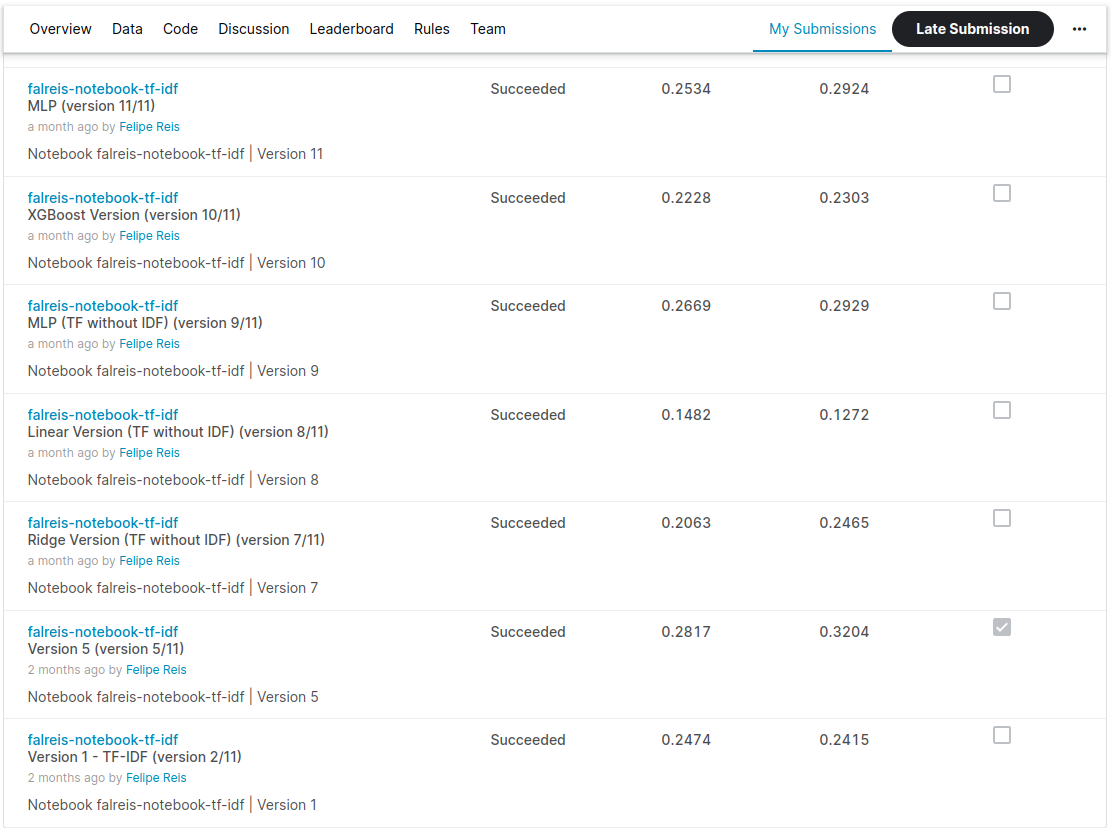

### Word2Vec

Para solução do problema utilizando Word2Vec, foi criado um algoritmo não supervisionado que calcula os valores esperados para a similaridade entre expressões. O modelo utiliza o Word2Vec para analisar a correlação entre as palavras e estabelecer uma métrica de similaridade.

Os valores definidos pelo algoritmo foram feitos com base na criação manual do algoritmo, a partir do entendimento dos dados, obtidos na avaliação da base de dados, no experimento usando TF-IDF e com auxílio dos scores existentes no conjunto de treinamento.

O algoritmo tenta associar palavras individualmente, estabelendo um *score* para a expressão de forma global.
Para isso, o algoritmo encontra as palavras similares usando o Word2Vec. 
O valor de similaridade entre as palavras é usada para cálculo do valor final.

Devido a características da base de dados, foram observadas algumas correlações entre expressões, de modo que foi possível estabelecer um algoritmo adequado.
O algoritmo executa processos diferente, de acordo com a quantidade de palavras na **frase-âncora** e **frase-alvo**, conforme detalhado abaixo (seguindo ordem de precedência):

* **1 palavra na âncora e também no alvo**: 
* * No cenário, o valor de similaridade recuperado pelo Word2Vec é definido como o valor de similaridade da expressão;
* **Quantidade iguais de palavras na âncora e no alvo**: 
* * No cenário, a similaridade de cada uma das palavras é somada, sendo que a palavra *n* na expressão tem seu valor de similaridade dividido por *n*. 
* * A soma das similaridades tem como objetivo indicar que expressões com mais palavras e que sejam muito próximas, realmente tem probabilidade mais alta de terem um mesmo significado.
* * Em caso de expressões idênticas, a similidade da palavra é definida como 0,5;
* * O decréscimo de similaridade foi adotado ao se observar que, em geral, a primeira palavra corresponde a um adjetivo que caracteriza o objeto, enquanto a segunda palavra tem conotação mais genérica. Com isso, a primeira expressão tem um peso maior, pois caracteriza mais o objeto. *Obs.: foram analisados diferentes métodos para combinar expressões*.
* **Quantidade diferente de palavras na âncora e no alvo**:
* * No cenário, a similaridade entre palavras é dividida pelo número de termos, produzindo a similaridade média.

No projeto, foram utilizados diferentes modelos Word2Vec pré-treinados, detalhados abaixo:

* *glove-wiki-gigaword-100*, por [RaRe-Technologies](https://github.com/RaRe-Technologies/gensim-data)
* *glove-wiki-gigaword-300*, por [RaRe-Technologies](https://github.com/RaRe-Technologies/gensim-data)
* *word2vec-google-news-300*, por [RaRe-Technologies](https://github.com/RaRe-Technologies/gensim-data)
* *w2vec_patent_domain*, por [Mustafa Sofean](https://www.kaggle.com/darshmso) 

Os três primeiros modelos foram disponibilizados pela biblioteca [Gensim](https://radimrehurek.com/gensim/index.html), em contextos genéricos, como notícias e informações do Wikipedia.

O último modelo foi publicado em 2018 na comunidade Kaggle e corresponde ao treinamento do Word2Vec no contexto de patentes (apesar de não diretamente relacionado às patentes da competição). O link para download do modelo é:   https://www.kaggle.com/datasets/darshmso/w2vec-patent-domain.

Os resultados obtidos com os modelos *word2vec-google-news-300* e *w2vec_patent_domain* foram semelhantes.
Em ambos os modelos não foram utilizados todas as expressões existentes - foram utilizadas entre 100.000 e 1.000.000 de expressões, ordenadas por frequência, com diferenças pouco significativas nos resultados obtidos.

Após testes locais utilizando diferentes variações no algoritmo, o método foi submetido ao Kaggle, para análise de desempenho.
Nessa submissões, foram variados os parâmetros correspondentes à quantidade de expressões similares existentes no Word2Vec (*topn*) e a quantidade de palavras utilizadas.
Em uma das submissões, o algoritmo foi alterado para cálculo diferente de similaridade quando a quantidade diferente de palavras na âncora e no alvo.

Na versão submetida ao Kaggle, a lematização de palavras foi removida, uma vez que tal mecanismo não era possível de ser executado usando a biblioteca [NLTK](https://www.nltk.org/).

*obs. 1: Foram observado erros de grafia em algumas palavras existentes na base de dados da competição. Nesse cenário, a palavra não era encontrada no Word2Vec e a similaridade era definida como zero (para a palavra). Apesar do conhecimento do problema, não foram adotados mecanismos de análise de erros de gramática, para aumento do desempenho.*

#### Resultados Kaggle

* *A primeira coluna de valores corresponde ao desempenho obtido na base de dados privada (12k pares de frases), enquanto a segunda coluna correspond ao desempenho obtido na base de dados pública (36 pares de frases).*
* *Como a submissão de códigos foi feita após o término da competição, as submissões contém um pequeno relógio vermelho ao lado do status, indicando que a competição já estava encerrada e a pontuação não seria utilizada para premiação.*
* *Algumas mensagens de erro indicam falha na execução de testes (ocorridas após manutenções no código).*

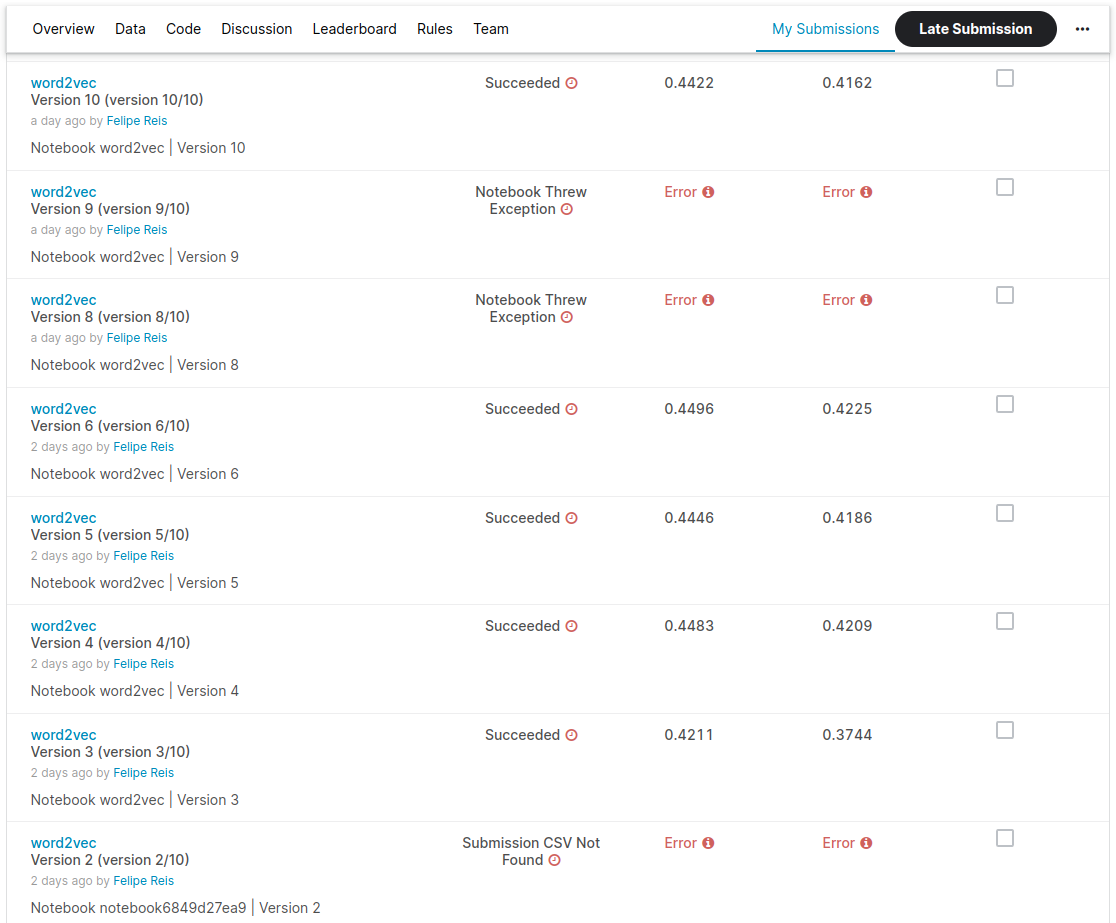

### BERT (Baseado Comunidade Kaggle)

O modelo utilizando BERT (e sua variação DeBERTa) teve como objetivo analisar como aplicar tais métodos na solução do problemas de NLP. 
O modelo teve como objetivo avaliar apenas o desempenho possível de ser alcançado ao utilizar essas bibliotecas, quando pré-treinadas para a tarefa de análise de patentes.

Os valores pré-treinados foram indicados pela comunidade como "*baseline*" dos resultados esperados.

No notebook criado, foi recuperado um modelo pré-treinado, utilizando pesos obtidos de https://www.kaggle.com/datasets/minegreen95/custom-bert-simple-deberta-v2-xlarge. 

Nesse notebook, foram utilizadas redes [Transformers](https://huggingface.co/transformers/v4.8.2/model_doc/bert.html?highlight=berttokenizer) e o modelo [DeBERTa](https://huggingface.co/transformers/v4.8.2/model_doc/deberta_v2.html).
A rede recuperou pesos já treinados e produziu quatro predições diferentes, que foram combinadas em uma única previsão, responsável pelo resultado final do modelo.

As quatro previsões utilizadas derivam da existência de 4 variações diferentes de regressores/classificadores dentro dos baselines disponibilizados pela comunidade.

Conforme pode ser observado no resultado abaixo, o desempenho obtido usando o modelo DeBERTa foi consideravelmente superior aos resultados obtidos utilizando outros modelos, como o Word2Vec e TF-IDF.

#### Referências

O notebook foi baseado nas submissões abaixo do Kaggle, publicadas pela comunidade.

* https://www.kaggle.com/code/aruthart/submission, por [Arto](https://www.kaggle.com/aruthart);
* https://www.kaggle.com/code/aruthart/eda-and-baseline/notebook, por [Arto](https://www.kaggle.com/aruthart);
* https://www.kaggle.com/code/surilee/inference-bert-for-uspatents-deepshare, por [Suri_Lee](https://www.kaggle.com/surilee);
* https://www.kaggle.com/code/renokan/2-deberta-1-roberta-analysis-and-using/notebook, por [Anatoly Burenok](https://www.kaggle.com/renokan);
* https://www.kaggle.com/code/yasufuminakama/pppm-deberta-v3-large-baseline-inference, por [Y.Nakama](https://www.kaggle.com/yasufuminakama).

#### Resultados Kaggle

* *A primeira coluna de valores corresponde ao desempenho obtido na base de dados privada (12k pares de frases), enquanto a segunda coluna correspond ao desempenho obtido na base de dados pública (36 pares de frases).*
* *Como a submissão de códigos foi feita após o término da competição, as submissões contém um pequeno relógio vermelho ao lado do status, indicando que a competição já estava encerrada e a pontuação não seria utilizada para premiação.*

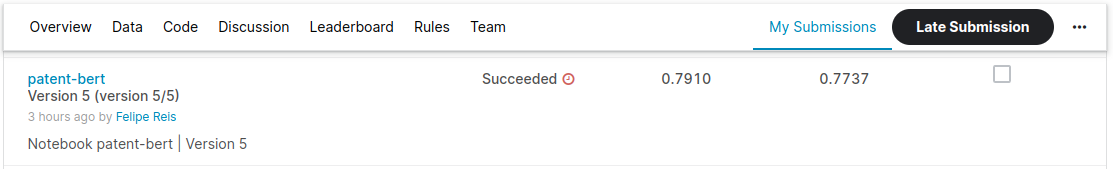

---
## Arquivos Públicos no Kaggle (próprio autor)

Devido a pequenas variações entre os códigos-fontes utilizados nos treinamentos locais e os códigos-fontes publicados no Kaggle, os códigos-fontes existentes no Kaggle foram tornados públicos.

As diferenças de código derivam da impossibilidade de uso da internet durante a submissão para avaliação de desempenho. Com isso, alguns comandos que fazem download de bibliotecas, como a ```nltk```, precisam ser substituídos, para uso de dados disponíveis no próprio Kaggle.

Nas submissões do Kaggle, trechos do código do arquivo [nlputil.py](nlputil.py) foram acrescidos aos notebooks.

Abaixo estão os códigos-fontes disponíveis na plataforma:

#### TF-IDF

* Código-fonte disponível em: https://www.kaggle.com/code/falreis/falreis-notebook-tf-idf/notebook

#### Word2Vec

* Código-fonte disponível em: https://www.kaggle.com/falreis/word2vec

#### BERT

* Código-fonte disponível em: https://www.kaggle.com/code/falreis/patent-bert/notebook.